# Análise Exploratória de Dados

Toda fase que envolva *Data Science* é importante ter uma Análise Exploratória de Dados para que entenda o dado. Essa etapa é a que normalmente se consegue extrair diversos *insights*. Essa análise exploratória será justamente foca em geração de *insights*. Foi realizado uma vistória prévia em relação aos dados que serão utilizados para saber quais são os dados faltantes,visto isso a fonte dos dados e o foco desse *notebook* (geração de *insights*) não será realizada a limpeza de dados.

## Importando Bibliotecas

In [1]:
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sys
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Carregando a Base de Dados

Os dados utilizados foram obtidos no site [consumidor.gov](https://www.consumidor.gov.br/), na parte de [Dados Abertos](https://www.consumidor.gov.br/pages/dadosabertos/externo/). Os arquivos são disponibilizados gratuitamente e em formato csv. Para esse *notebook* os dados utilizados foram referentes ao ano de 2020, até o mês de Novembro já que quando esse *notebook* foi confeccionado apenas até esse mês estava disponível. 

Para dar entrada nos dados foi utilizado a biblioteca Pandas, para alguns arquivos foi necessário colocar o *encoding* para que o arquivo fosse lido de forma correta visto que o seu *encoding* é diferente do comum do Pandas. 

In [2]:
janeiro = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-01.csv', encoding='latin-1', sep = ';')
fevereiro = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-02.csv', encoding='latin-1', sep = ';')
marco = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-03.csv', encoding='latin-1', sep = ';')
abril = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-04.csv', encoding='latin-1', sep = ';')
maio = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-05.csv', encoding='latin-1', sep = ';')
junho = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-06.csv', encoding='latin-1', sep = ';')
julho = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-07.csv',encoding='latin-1', sep = ';')
agosto = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-08.csv', sep = ';')
setembro = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-09.csv', sep = ';')
outubro = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-10.csv', sep = ';')
novembro = pd.read_csv('/home/renata/Desktop/Cursos/projetos/Análise de Dados/2020-11.csv', sep = ';')

As colunas de todos os *Datasets* são iguais, por isso não se faz necessário fazer a visualização de todos os dados antes de começar fazer a análise de dados.

In [3]:
janeiro.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,S,PR,Curitiba,F,entre 31 a 40 anos,01/01/2020,10.0,Itaucard,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",SMS / Mensagem de texto,N,S,Finalizada não avaliada,Não Avaliada,NaN,1
1,S,PR,São José dos Pinhais,F,entre 21 a 30 anos,01/01/2020,10.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Móvel,Contrato / Oferta,Alteração de plano/contrato sem solicitação ou...,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,1
2,SE,ES,Serra,M,entre 41 a 50 anos,03/01/2020,9.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
3,SE,SP,Jundiaí,M,entre 31 a 40 anos,04/01/2020,9.0,Americanas.com,Comércio Eletrônico,Produtos Eletrodomésticos e Eletrônicos,"Eletroportáteis ( batedeira, liquidificador, u...",Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,1
4,S,RS,Porto Alegre,M,entre 61 a 70 anos,07/01/2020,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Pessoal e Demais Empréstimos (exceto f...,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,1


In [4]:
janeiro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74357 entries, 0 to 74356
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Região                  74357 non-null  object 
 1   UF                      74357 non-null  object 
 2   Cidade                  74357 non-null  object 
 3   Sexo                    74357 non-null  object 
 4   Faixa Etária            74357 non-null  object 
 5   Data Finalização        74357 non-null  object 
 6   Tempo Resposta          73746 non-null  float64
 7   Nome Fantasia           74357 non-null  object 
 8   Segmento de Mercado     74357 non-null  object 
 9   Área                    74357 non-null  object 
 10  Assunto                 74357 non-null  object 
 11  Grupo Problema          74357 non-null  object 
 12  Problema                74357 non-null  object 
 13  Como Comprou Contratou  74357 non-null  object 
 14  Procurou Empresa        74357 non-null

In [5]:
datasets = [janeiro, fevereiro, marco, abril, maio, junho, julho, agosto, setembro, outubro, novembro]

In [6]:
datasets_2020 = pd.concat(datasets)
datasets_2020

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,S,PR,Curitiba,F,entre 31 a 40 anos,01/01/2020,10.0,Itaucard,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",SMS / Mensagem de texto,N,S,Finalizada não avaliada,Não Avaliada,NaN,1.0
1,S,PR,São José dos Pinhais,F,entre 21 a 30 anos,01/01/2020,10.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Móvel,Contrato / Oferta,Alteração de plano/contrato sem solicitação ou...,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,1.0
2,SE,ES,Serra,M,entre 41 a 50 anos,03/01/2020,9.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Atendimento / SAC,Dificuldade de contato / acesso a outros canai...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,1.0
3,SE,SP,Jundiaí,M,entre 31 a 40 anos,04/01/2020,9.0,Americanas.com,Comércio Eletrônico,Produtos Eletrodomésticos e Eletrônicos,"Eletroportáteis ( batedeira, liquidificador, u...",Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,N,S,Finalizada não avaliada,Não Avaliada,NaN,1.0
4,S,RS,Porto Alegre,M,entre 61 a 70 anos,07/01/2020,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Crédito Pessoal e Demais Empréstimos (exceto f...,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107242,N,PA,Ananindeua,F,entre 31 a 40 anos,2020-11-30,0.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Resolvida,5.0,NaN
107243,SE,MG,Uberlândia,M,entre 21 a 30 anos,2020-11-30,0.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Não Resolvida,3.0,NaN
107244,NE,RN,Equador,M,entre 31 a 40 anos,2020-11-30,0.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Não Resolvida,1.0,NaN
107245,SE,RJ,Magé,M,entre 31 a 40 anos,2020-11-30,0.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Não Resolvida,2.0,NaN


Foi utilizada a função "pd.concat()" para concatenar todos os dados, ou seja, foi feita uma junção de todos os dados em apenas uma variável. Como foi dito anteriormente as colunas de todos os *datasets* são iguais, portanto é fácil fazer a junção de todos os meses para ter uma base de dados única ao invés de toda sempre ser necessário ler arquivo por arquivo, isso facilita muito já que a análise desejada é de todos os meses do ano e não de um em específico. 

A função *concat* é muito útil e fácil de ser utilizada para diversas aplicações, como por exemplo, poderíamos desejar a interseção dos dados ao invés da união de todos, para fazer isso bastaria fazer uma pequena mudanção dentro da função e seria realizado. Isso facilita muito principalmente com um grande número de dados que seria impossível de realizar essa concateção de tabelas à mão. Para saber mais sobre essa função basta consultar a sua [documentação](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

Visto que essa análise está focando em *insights* foram definidas algumas hipóteses simples para que elas possam ser validadas com dado ou não. O interessante da Análise de Dados é que a medida que se trabalha com os dados irá ter cada vez mais ideias. A geração de hipóteses é sempre importante porque dessa forma saberá o que se desea obter através dos dados e se nesses dados tem todas as informações necessárias, caso não tenha todas as informações necessárias será necessário procurar outra fonte complementar ou então - se for trabalho para uma empresa - solicitar a pessoa responsável por colher os dados. Um ponto importante é que antes de testar as hipóteses é necessário ter algumas ideias dos dados que serão utilizados, para que assim seja possível gerar as hipóteses e os resultados.

## Número de Reclamações por Estado 

**Hipótese 1**: Os estados da região Sudeste (região mais populosa) são os estados que mais possuem reclamações registradas.

Essa Hipótese é feita com base de que se espera que os estados que tem mais pessoas também sejam os lugares que possuem maior número de reclamações. 

In [7]:
datasets_2020['UF'].value_counts(ascending=False)

SP    282922
MG    107443
PR     98727
RJ     93663
RS     76797
BA     60782
DF     45009
SC     42774
GO     32063
CE     29386
PE     28246
ES     27366
MS     22461
MA     20691
MT     20629
PI     18582
PA     13244
PB     11655
AM     10840
RN      8256
AL      7065
SE      5260
TO      5068
RO      4434
AC      3238
AP      1398
RR      1392
Name: UF, dtype: int64

A **Hipótese 1** é **falso**, não foi validado pelo fato de que o estado de que o terceiro estado que possui maior número de reclamações é o Paraná que não é um estado da região Sudeste. Mesmo que a hipótese não tenha sido validada é importante ver que 3 dos 4 estados da região Sudeste estão entre os quatro primeiros colocados com maior número de reclamações. 

## Quantidade de Reclamações por Sexo

**Hipótese 2**: Os homens fazem mais reclamações. 

In [8]:
datasets_2020['Sexo'].value_counts()

M    605094
F    474063
O       222
Name: Sexo, dtype: int64

A sigla "O" é referente e "outros sexos" para aquelas pessoas que não se identificam nem com o sexo feminino nem masculino.

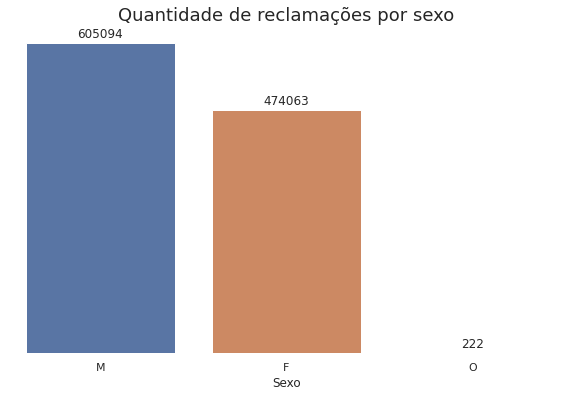

In [65]:
sns.set(style = 'whitegrid')
#sexo = datasets_2020[u'Sexo'].unique()[:-1]
cont = datasets_2020['Sexo'].value_counts()
fig, ax = plt.subplots(figsize = (10, 6))
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
sns.barplot(x = ['M', 'F', 'O'], y = cont)
for i in range(0, len(cont)):
    plt.annotate(str(cont[i]), (i, cont[i] + 10000), ha = 'center')
plt.title('Quantidade de reclamações por sexo', fontsize = 18)
plt.xlabel('Sexo')
plt.grid(False)
plt.gca().axes.get_yaxis().set_visible(False);

A **hipótese 2** é verdadeira, realmente os homens fazem mais reclamações do que as demais opções de sexo. 

## Faixa Etária de Consumidores por Sexo

In [ ]:
datasets_2020.groupby('Sexo')['Faixa Etária'].value_counts()